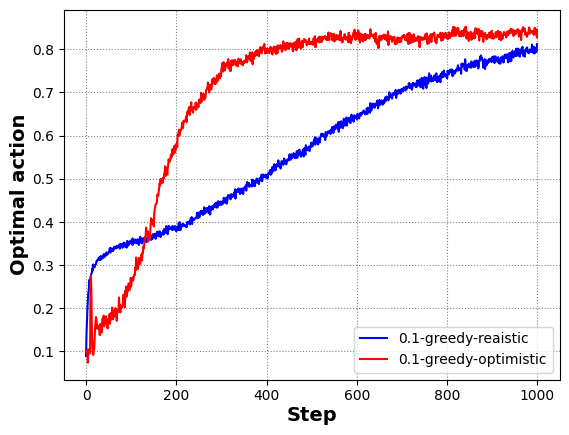

In [1]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
step = 1000
runs = 2000
sigma = 1  # 10-armed testbed 的正态分布标准差
miu_lst = [0.2, -0.85, 1.55, 0.3, 1.2, -1.5, -0.2, -1.0, 0.9, -0.6]  # 10-armed testbed 的正态分布均值列表
step_size = 0.1

best_action_index = miu_lst.index(max(miu_lst))


def action_reward(action):  # 10-armed 赌博机testbed，输入动作序号，输出对应的奖励值
    reward = miu_lst[action]+np.random.normal(0, scale=sigma)
    return reward


def random_index(rate):  # 输入概率列表，按照列表的概率输出对应动作的索引
    # """随机变量的概率函数"""
    # 参数rate为list<int>
    # 返回概率动作的下标索引
    start = 0
    index = 0
    randnum = random.randint(1, sum(rate))
    for index, scope in enumerate(rate):
        start += scope
        if randnum <= start:
            break
    return index


def max_index(lst):  # 寻找列表中最大值的索引，如果有多个，则随机输出一个索引
    index_lst = []
    max_n = max(lst)
    for i in range(len(lst)):
        if lst[i] == max_n:
            index_lst.append(i)
    max_index = random.sample(index_lst, 1)
    max_index = max_index[0]
    return max_index


def greedy_optimistic(epsilon, step, runs):  # 贪婪策略，输入epsilon、步长step、平均奖励列表Q、计数列表N、概率列表P,总独立测试次数，输出平均奖励
    action_runs_lst = [[] for k in range(runs)]  # 二维列表，存放所有runs的所有step的最佳动作判断变量，1是正确动作，0不是最佳动作
    action_runs_lst_average = [0 for j in range(step)]  # 一维列表，将 action_runs_lst 中的所有runs的对应step的action求平均
    for run_times in range(0, runs):
        Q = [5 for i in range(10)]  # 奖励均值
        N = [0 for j in range(10)]  # 计数列表
        P = [0 for k in range(10)]  # 概率列表
        k = 1

        while k <= step:
            sum_best_action = 0
            for i in range(0, 10):
                P[i] = 1000*epsilon/10
            max_ = max_index(Q)
            P[max_] = 1000 - 1000*epsilon + P[max_]
            # print('第', k, '次迭代的概率列表P为', P)
            action_id = random_index(P)  # 得到在概率列表P下的动作索引

            if action_id == best_action_index:
                sum_best_action += 1
            action_runs_lst[run_times].append(sum_best_action)

            # print('第', k, '次迭代的选择动作为', action_id)
            N[action_id] = N[action_id] + 1
            # print('第', k, '次迭代的计数列表N为', N)
            Q[action_id] = Q[action_id] + step_size *(action_reward(action_id) - Q[action_id])
            # print('第', k, '次迭代的奖励均值列表Q为', Q)
            k += 1

    # print(action_runs_lst)
    for i in range(0, step):
        for j in range(0, runs):
            action_runs_lst_average[i] = action_runs_lst_average[i] + action_runs_lst[j][i]
        action_runs_lst_average[i] = action_runs_lst_average[i]/runs
    # print(action_runs_lst_average)
    return action_runs_lst_average


def greedy_reaistic(epsilon, step, runs):  # 贪婪策略，输入epsilon、步长step、平均奖励列表Q、计数列表N、概率列表P,总独立测试次数，输出平均奖励
    action_runs_lst = [[] for k in range(runs)]  # 二维列表，存放所有runs的所有step的最佳动作判断变量，1是正确动作，0不是最佳动作
    action_runs_lst_average = [0 for j in range(step)]  # 一维列表，将 action_runs_lst 中的所有runs的对应step的action求平均
    for run_times in range(0, runs):
        Q = [0 for i in range(10)]  # 奖励均值
        N = [0 for j in range(10)]  # 计数列表
        P = [0 for k in range(10)]  # 概率列表
        k = 1

        while k <= step:
            sum_best_action = 0
            for i in range(0, 10):
                P[i] = 1000*epsilon/10
            max_ = max_index(Q)
            P[max_] = 1000 - 1000*epsilon + P[max_]
            # print('第', k, '次迭代的概率列表P为', P)
            action_id = random_index(P)  # 得到在概率列表P下的动作索引

            if action_id == best_action_index:
                sum_best_action += 1
            action_runs_lst[run_times].append(sum_best_action)

            # print('第', k, '次迭代的选择动作为', action_id)
            N[action_id] = N[action_id] + 1
            # print('第', k, '次迭代的计数列表N为', N)
            Q[action_id] = Q[action_id] + step_size *(action_reward(action_id) - Q[action_id])
            # print('第', k, '次迭代的奖励均值列表Q为', Q)
            k += 1

    # print(action_runs_lst)
    for i in range(0, step):
        for j in range(0, runs):
            action_runs_lst_average[i] = action_runs_lst_average[i] + action_runs_lst[j][i]
        action_runs_lst_average[i] = action_runs_lst_average[i]/runs
    # print(action_runs_lst_average)
    return action_runs_lst_average


_010_greedy1 = greedy_reaistic(0.1, step, runs)
_010_greedy2 = greedy_optimistic(0.1, step, runs)


x = np.arange(step)
plt.plot(x, _010_greedy1, color='blue')
plt.plot(x, _010_greedy2, color='red')
plt.legend(["0.1-greedy-reaistic", "0.1-greedy-optimistic"])
plt.grid(color='gray', linestyle=':')
plt.xlabel("Step", fontweight='bold', fontsize=14, labelpad=2)
plt.ylabel('Optimal action', fontweight='bold', fontsize=14, labelpad=2)
plt.show()